## Data Understanding and Loading:


In [32]:
#cellule des importations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [33]:
data = pd.read_csv('weatherAUS.csv')
print(data.head())

         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7    

In [34]:
#Checking the names of the columns we are working on
cols=data.columns
print(cols)


Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


<span style="color:blue">*Domain Knowledge*</span>

**Date (object)**</br>
Description : La date d'enregistrement des données météorologiques.</br>
Rôle : Peu utile pour l'apprentissage directement, mais peut être transformée en des variables temporelles utiles comme le mois ou la saison.</br>

**Location (object)**</br>
Description : La station météorologique où les données ont été enregistrées.</br>
Rôle : Variable catégorielle importante, car les conditions météorologiques varient selon les régions.</br>

**MinTemp (float64)**</br>
Description : La température minimale enregistrée (en °C) au cours des dernières 24 heures.</br>
Rôle : Indicateur potentiel des conditions nocturnes, pourrait influencer la probabilité de pluie.</br>

**MaxTemp (float64)**</br>
Description : La température maximale enregistrée (en °C) au cours des dernières 24 heures.</br>
Rôle : Une température élevée pourrait indiquer des conditions sèches, affectant la probabilité de pluie.</br>

**Rainfall (float64)**</br>
Description : La quantité totale de pluie enregistrée (en mm) au cours des dernières 24 heures.</br>
Rôle : Facteur crucial, car les précipitations actuelles influencent souvent celles du jour suivant.</br>

**Evaporation (float64)**</br>
Description : Quantité d'eau évaporée (en mm) au cours des dernières 24 heures.</br>
Rôle : Indicateur des conditions d'humidité et de température, mais a de nombreuses valeurs manquantes.</br>

**Sunshine (float64)**</br>
Description : Durée d'ensoleillement (en heures) au cours des dernières 24 heures.</br>
Rôle : Peut être corrélée négativement avec les précipitations (plus de soleil = moins de pluie).</br>

**WindGustDir (object)**</br>
Description : Direction du vent la plus forte enregistrée au cours des dernières 24 heures.</br>
Rôle : Peut influencer les conditions atmosphériques et la formation des précipitations.</br>

**WindGustSpeed (float64)**</br>
Description : Vitesse maximale des rafales de vent (en km/h) enregistrée au cours des dernières 24 heures.</br>
Rôle : Des vents forts peuvent être associés à des systèmes météorologiques intenses, comme des orages.</br>

**WindDir9am (object)**</br>
Description : Direction du vent enregistrée à 9h du matin.</br>
Rôle : Donne des informations sur les conditions météorologiques matinales.</br>

**WindDir3pm (object)**</br>
Description : Direction du vent enregistrée à 15h.</br>
Rôle : Variable importante, car les conditions de l'après-midi influencent souvent les précipitations nocturnes.</br>

**WindSpeed9am (float64)**</br>
Description : Vitesse du vent (en km/h) à 9h du matin.</br>
Rôle : Peut refléter les conditions météorologiques générales.</br>

**WindSpeed3pm (float64)**</br>
Description : Vitesse du vent (en km/h) à 15h.</br>
Rôle : Indicateur clé des conditions atmosphériques à un moment critique.</br>

**Humidity9am (float64)**</br>
Description : Humidité relative (%) enregistrée à 9h du matin.</br>
Rôle : Une humidité élevée peut indiquer des conditions favorables à la pluie.</br>

**Humidity3pm (float64)**</br>
Description : Humidité relative (%) enregistrée à 15h.</br>
Rôle : Variable souvent fortement corrélée avec RainTomorrow.</br>

**Pressure9am (float64)**</br>
Description : Pression atmosphérique (en hPa) à 9h du matin.</br>
Rôle : Une baisse de pression peut indiquer des conditions propices à la pluie.</br>

**Pressure3pm (float64)**</br>
Description : Pression atmosphérique (en hPa) à 15h.</br>
Rôle : Même rôle que Pressure9am, mais reflète les conditions atmosphériques en après-midi.</br>

**Cloud9am (float64)**</br>
Description : Fraction de la couverture nuageuse (0-8) à 9h du matin.</br>
Rôle : Une couverture nuageuse élevée peut indiquer une probabilité accrue de pluie.</br>

**Cloud3pm (float64)**</br>
Description : Fraction de la couverture nuageuse (0-8) à 15h.</br>
Rôle : Comme Cloud9am, mais pour les conditions de l'après-midi.</br>

**Temp9am (float64)**</br>
Description : Température (en °C) enregistrée à 9h du matin.</br>
Rôle : Utile pour capturer les conditions météorologiques matinales.</br>
</br>
**Temp3pm (float64)**
Description : Température (en °C) enregistrée à 15h.</br>
Rôle : Peut refléter les conditions climatiques en journée.</br>

**RainToday (object)**</br>
Description : Indique si la pluie a été enregistrée aujourd'hui ("Yes" ou "No").</br>
Rôle : Variable importante, car elle influence directement RainTomorrow.</br>

**RainTomorrow (object)**</br>
Description : Variable cible. Indique si la pluie tombera le jour suivant ("Yes" ou "No").</br>
Rôle : C'est la variable que nous cherchons à prédire.</br>

In [36]:
#checking how many locations we are dealing with 
print(len(data['Location'].unique()))

49


In [38]:
#Checking the type of the data of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [43]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [45]:
#a quick summary of our data to have an intial look at what we are dealing with
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


For a general look from this table we notice a several missing data looking at the count row 

In [48]:
#checking the size of our data because I noticed some missing values 
data.shape

(145460, 23)

## Data Cleaning & Exploration:

First things first, I will be treating the data types of our columns

In [52]:
#converting the date column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

In [54]:
#Checking if the conversion was successful
data.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

In [56]:
#Seeing how many missing values we are dealing with
missing_values = data.isnull().sum()
print(missing_values)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [58]:
#checking the percentage of missing values in each column
missing_pct = round(missing_values/len(data) * 100, 1)
print(missing_pct)

Date              0.0
Location          0.0
MinTemp           1.0
MaxTemp           0.9
Rainfall          2.2
Evaporation      43.2
Sunshine         48.0
WindGustDir       7.1
WindGustSpeed     7.1
WindDir9am        7.3
WindDir3pm        2.9
WindSpeed9am      1.2
WindSpeed3pm      2.1
Humidity9am       1.8
Humidity3pm       3.1
Pressure9am      10.4
Pressure3pm      10.3
Cloud9am         38.4
Cloud3pm         40.8
Temp9am           1.2
Temp3pm           2.5
RainToday         2.2
RainTomorrow      2.2
dtype: float64


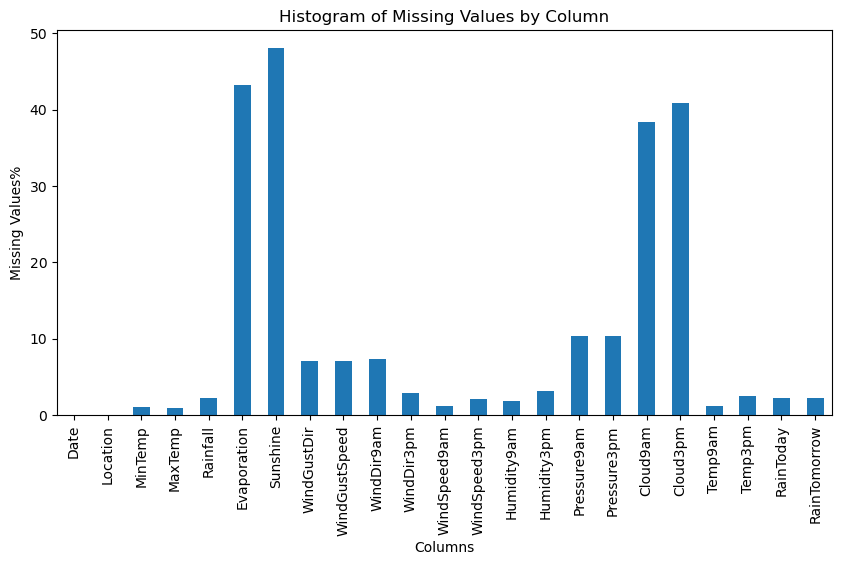

In [60]:
# Plotting a histogram of missing values to understand the pattern better
plt.figure(figsize=(10, 5))
missing_pct.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Values%')
plt.title('Histogram of Missing Values by Column')
plt.show()


**After visualizing our missing data we can see that we have 4 columns that have many missing values.
Almost half values in Sunshine and almost half values in Evaporation are missing. Those 2 will be probably dropped.**


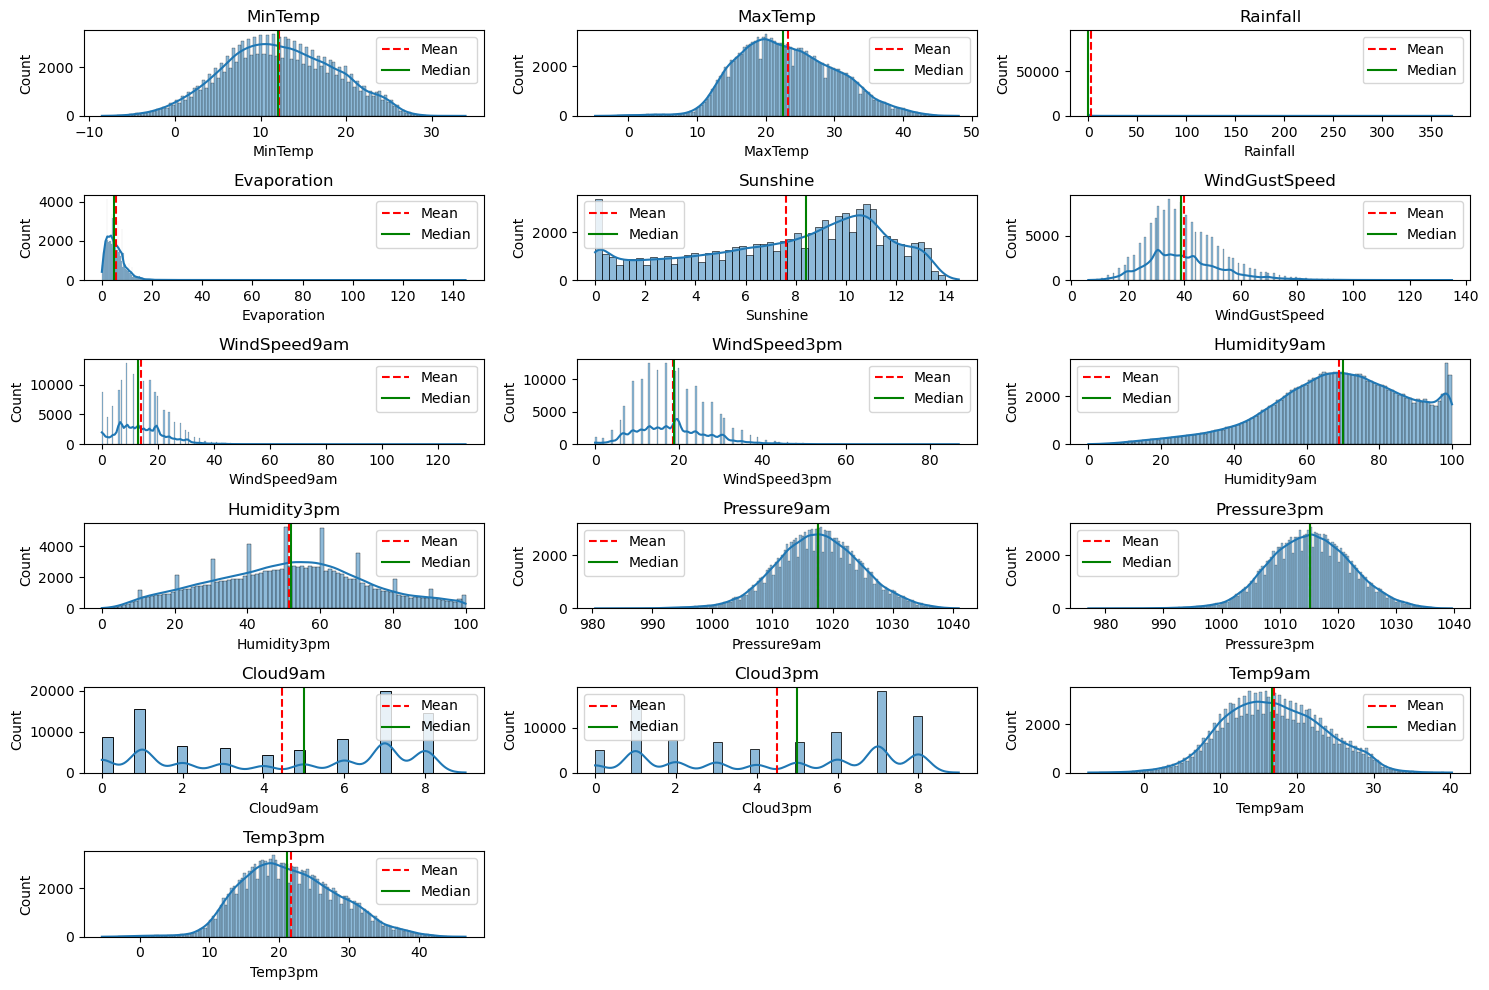

In [63]:
# Plotting histograms for each numerical column, to see if I'm imputing the missing values should I use the mean or the median

# Select numerical columns from the DataFrame that are of type float64 or int64
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size for the plots
plt.figure(figsize=(15, 10))

# Loop through each numerical column to create a histogram
for i, col in enumerate(numerical_cols):
    # Create a subplot for each histogram, arranging them in a grid
    plt.subplot(len(numerical_cols)//3 + 1, 3, i + 1)
    
    # Plot the histogram with a kernel density estimate (KDE) overlay
    sns.histplot(data[col], kde=True)
    
    # Add a vertical line for the mean of the column
    plt.axvline(data[col].mean(), color='r', linestyle='--', label='Mean')
    
    # Add a vertical line for the median of the column
    plt.axvline(data[col].median(), color='g', linestyle='-', label='Median')
    
    # Set the title of the subplot to the column name
    plt.title(col)
    
    # Display the legend for the mean and median lines
    plt.legend()

# Adjust the layout to prevent overlap of subplots
plt.tight_layout()

# Show the plots
plt.show()

**I decided to drop the sunshine and evaporation column as it has a lot of missing values and It doesnt serve me much as i have other factors that tell me about the temperature and the clouds. Also I'll be imputing the other missing values (numerical) with median rather than the mean because as we can see from the above charts it's more convenient as we aren't always dealing with perfect gaussian distributions**


In [66]:
#dropping the sunshine and Evaporation columns
data= data.drop(columns =['Sunshine','Evaporation'])


In [68]:
#checking if the drop was effective
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [70]:
#I love printing the head of my data every now and then it keeps me aware of how I should proceed
print(data.head())

        Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0 2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1 2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2 2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3 2008-12-04   Albury      9.2     28.0       0.0          NE           24.0   
4 2008-12-05   Albury     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity9am  Humidity3pm  \
0          W        WNW          20.0  ...         71.0         22.0   
1        NNW        WSW           4.0  ...         44.0         25.0   
2          W        WSW          19.0  ...         38.0         30.0   
3         SE          E          11.0  ...         45.0         16.0   
4        ENE         NW           7.0  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0     

In [72]:
# Extracting columns with missing values less than 50%
cols_of_missing_val = missing_pct[(missing_pct > 0) & (missing_pct < 50)].index

# Filtering only numerical columns because we will impute by the median
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
cols_of_missing_val = [col for col in cols_of_missing_val if col in numerical_cols]

# Iterating to replace missing values
for col in cols_of_missing_val:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

# Now let's check if we still have missing values
print(data.isnull().sum())


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64


we got rid of numerical missing data now let's deal with the other ones 

In [75]:
data['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

As for categorical columns we will be filling up missing values with the most frequent values

In [78]:
# Get the categorical columns with missing values
categorical_cols = data.select_dtypes(include=['object']).columns
cols_of_missing_val_cat = [col for col in categorical_cols if data[col].isnull().sum() > 0]

# Replace missing values with the mode (most frequent value)
for col in cols_of_missing_val_cat:
    mode_value = data[col].mode()[0]  # Get the most frequent value
    data[col].fillna(mode_value, inplace=True)

# Check if missing values are resolved
print(data[cols_of_missing_val_cat].isnull().sum())


WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64


In [80]:
#Checking we don't have any more missing values 
data['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

**Now we will be checking which columns need to be one hot encoded as we don't want our data to be overcrowded with columns we should be very picky in this step**

In [83]:
data['WindGustDir'].nunique()

16

In [85]:
data['WindDir9am'].nunique()

16

In [87]:
data['WindDir3pm'].nunique()#

16

In [89]:
# Convert 'Yes' to 1 and 'No' to 0 for binary columns
data['RainToday'] = data['RainToday'].map({'Yes': 1, 'No': 0})
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Check the result
print(data[['RainToday', 'RainTomorrow']].head())


   RainToday  RainTomorrow
0          0             0
1          0             0
2          0             0
3          0             0
4          0             0


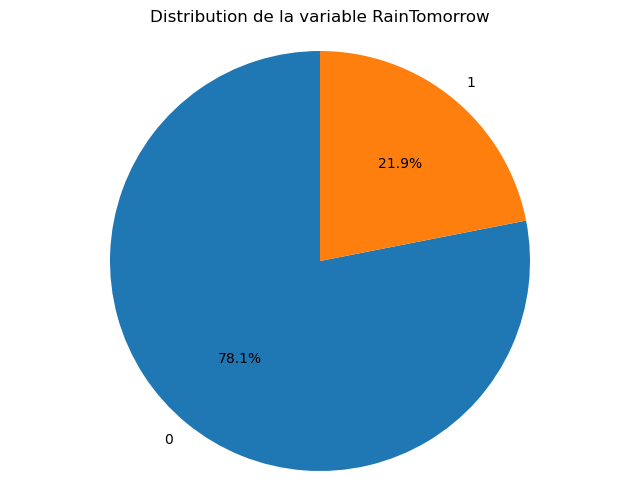

In [91]:
# calculating the distribution of'RainTomorrow'
distribution = data['RainTomorrow'].value_counts()

# Creating the pie chart
plt.figure(figsize=(8, 6))
plt.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution de la variable RainTomorrow')
plt.axis('equal')  # we want a circular chat
plt.show()
#yes is 1 and no is 0

**This imbalance in our target variable may be critical for our models afterwards because models trained on imbalanced datasets may become biased towards the majority class (in this case, "0"), resulting in poor performance for the minority class (in this case, "1").</br>
We can apply some techniques to handle this imbalance like resamling the data using techniques like SMOTE (Synthetic Minority Oversampling Technique) to generate synthetic samples for the minority class, or Undersampling the Majority Class: (Randomly remove samples from the majority class to balance the dataset). </br>**


**As a matter of fact, Many models, like Logistic Regression, SVM, and Random Forest, allow you to specify class_weight='balanced' in their parameters.**
<div style="color:red;">Important Note To bear in mind:</div> 
Accuracy alone may not be sufficient. we should Use metrics like precision, recall, F1-score, or ROC-AUC to better evaluate model performance for imbalanced data.

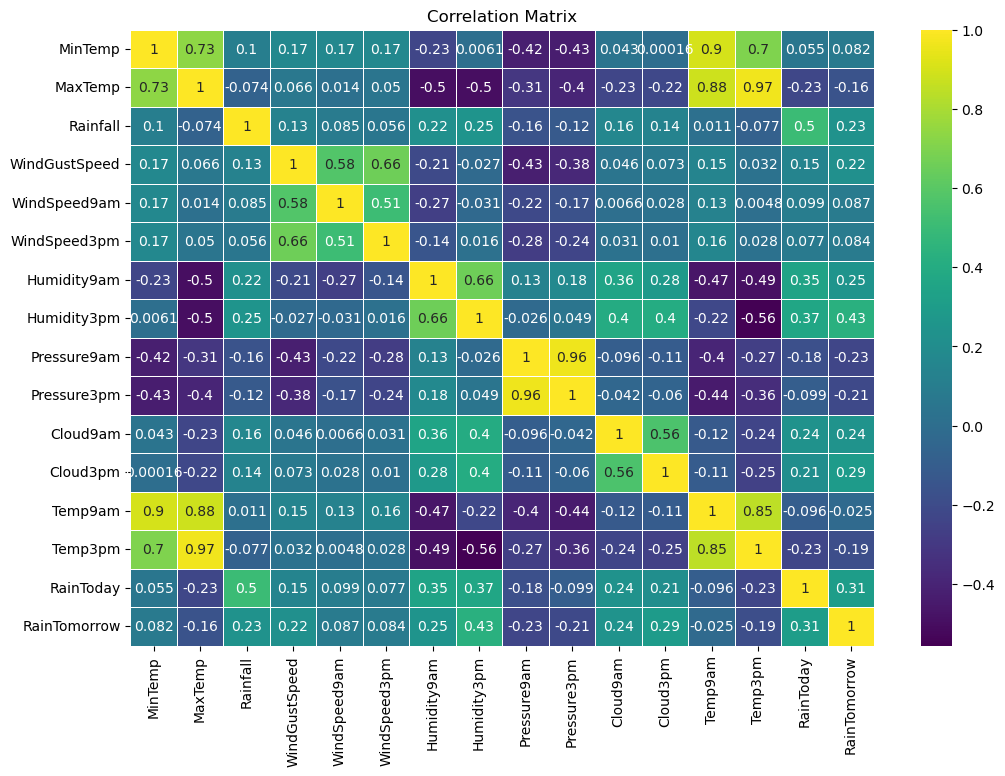

In [94]:
#checking the correlation matrix will give us a more thourough idea about the relation between the different features
numeric_data= data.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Sometimes there are highly correlated features that just increase the dimensionality of the feature space and do not good for the model’s performance. So we must check whether there are highly correlated features in this dataset or not.

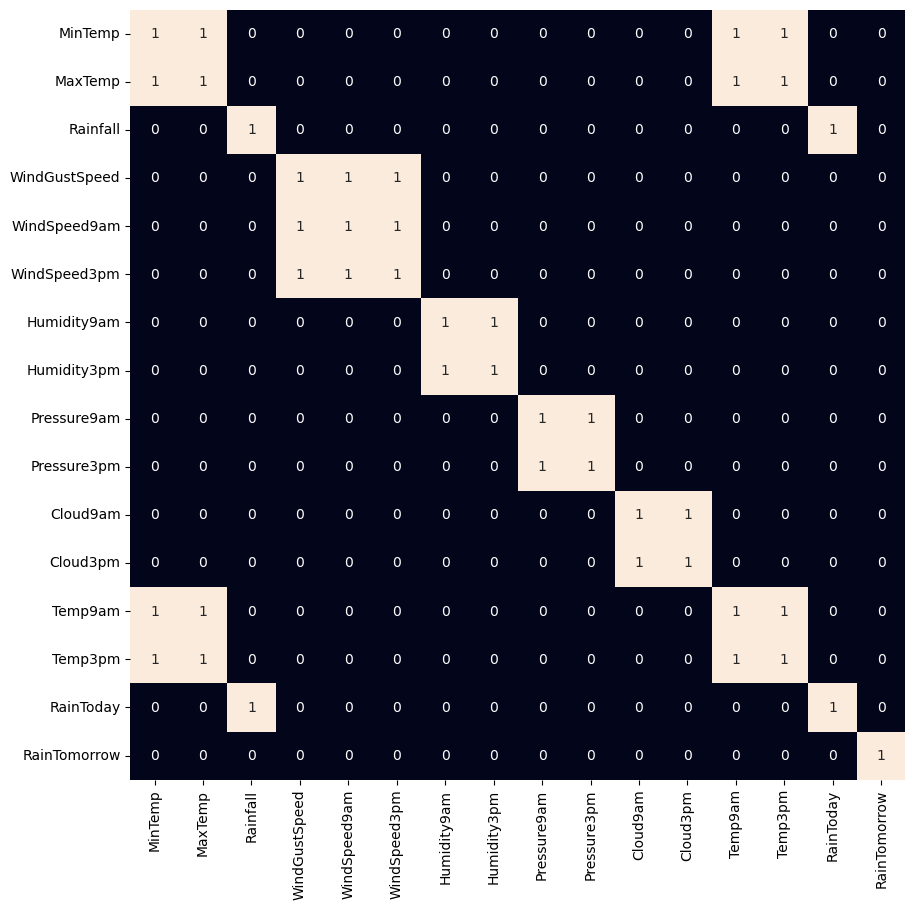

In [97]:
# Create a new figure with a specified size of 10x10 inches
plt.figure(figsize=(10,10))

# Generate a heatmap to visualize the correlation matrix of numeric_data
# The condition (numeric_data.corr() > 0.5) creates a boolean mask for correlations greater than 0.5
# 'annot=True' displays the correlation coefficients on the heatmap
# 'cbar=False' hides the color bar
sns.heatmap(numeric_data.corr() > 0.5,
           annot=True,
           cbar=False)

# Display the heatmap
plt.show()

In [98]:
#checking how to deal with the location column, it is for sure not to be one hot encoded as it has 49 different values
unique_locations_count = data['Location'].nunique()
print(unique_locations_count)

49


In [101]:
unique_WindDir3pm = data['WindDir3pm'].nunique()
print(unique_WindDir3pm)

16


let's make sure that location is an important feature as I think it is by running some tests

In [104]:
from scipy.stats import chi2_contingency

# Create a contingency table for Location vs RainTomorrow
contingency_location = pd.crosstab(data['Location'], data['RainTomorrow'])

# Perform the Chi-square test on the contingency table
chi2_location, p_location, dof_location, expected_location = chi2_contingency(contingency_location)

# Print the results of the Chi-square test for Location vs RainTomorrow
print(f"Location vs RainTomorrow:\nChi2: {chi2_location}, p-value: {p_location}")

# Create a contingency table for WindDir3pm vs RainTomorrow
contingency_wind = pd.crosstab(data['WindDir3pm'], data['RainTomorrow'])

# Perform the Chi-square test on the contingency table
chi2_wind, p_wind, dof_wind, expected_wind = chi2_contingency(contingency_wind)

# Print the results of the Chi-square test for WindDir3pm vs RainTomorrow
print(f"WindDir3pm vs RainTomorrow:\nChi2: {chi2_wind}, p-value: {p_wind}")


Location vs RainTomorrow:
Chi2: 3472.455699669724, p-value: 0.0
WindDir3pm vs RainTomorrow:
Chi2: 1206.2050760012553, p-value: 7.603325475921598e-248


- looking at these results we can definitely say that location and raintommorw have a strong association and for the p value it tells us that this association is statistically significant and we can now reject the null hypothesis that there is no association between these variables.</br>
- for the windDir3pm the chi2 is also high indicating a strong association between them while the p value is extremely small so same thing like the above variable. 

There is no way that we will be dropping location then , and we can't also apply one hot encoding on it as well because it has 49 different values so that will result in an overload of features that's why we will be adapting another approach.</br>

**SOLUTION** : We will be creating new features based on the "Location" column, such as the mean and standard deviation of rainfall, mean maximum and minimum temperatures, and the frequency of rain today.
then we will merge these new features back into the original DataFrame and drops the "Location" column.

In [108]:
#grouping by location and calculating the different stats
location_stats = data.groupby("Location").agg({
    "Rainfall": ["mean", "std"],  # Mean and standard deviation of rainfall
    "MaxTemp": "mean",           # Mean maximum temperature
    "MinTemp": "mean",           # Mean minimum temperature
    "RainToday": lambda x: (x == "1").mean(),  # Frequency of rain today
}).reset_index()#used to convert the grouped data back into a DataFrame.


In [110]:
#renaming the columns of the location_stats DataFrame to make them more descriptive.
location_stats.columns = ["Location", "Rainfall_mean", "Rainfall_std", "MaxTemp_mean", "MinTemp_mean", "RainToday_freq"]


In [112]:
data = data.merge(location_stats, on="Location", how="left")#The how="left" parameter ensures that all rows from the original DataFrame are kept, and the derived features are added


In [114]:
#dropping Location column as it is no longer needed after merging the derived features
data = data.drop("Location", axis=1)


In [116]:
print(data.head())

        Date  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0 2008-12-01     13.4     22.9       0.6           W           44.0   
1 2008-12-02      7.4     25.1       0.0         WNW           44.0   
2 2008-12-03     12.9     25.7       0.0         WSW           46.0   
3 2008-12-04      9.2     28.0       0.0          NE           24.0   
4 2008-12-05     17.5     32.3       1.0           W           41.0   

  WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Cloud3pm  Temp9am  \
0          W        WNW          20.0          24.0  ...       5.0     16.9   
1        NNW        WSW           4.0          22.0  ...       5.0     17.2   
2          W        WSW          19.0          26.0  ...       2.0     21.0   
3         SE          E          11.0           9.0  ...       5.0     18.1   
4        ENE         NW           7.0          20.0  ...       8.0     17.8   

   Temp3pm  RainToday  RainTomorrow  Rainfall_mean  Rainfall_std  \
0     21.8          0         

## Dealing with outliers:

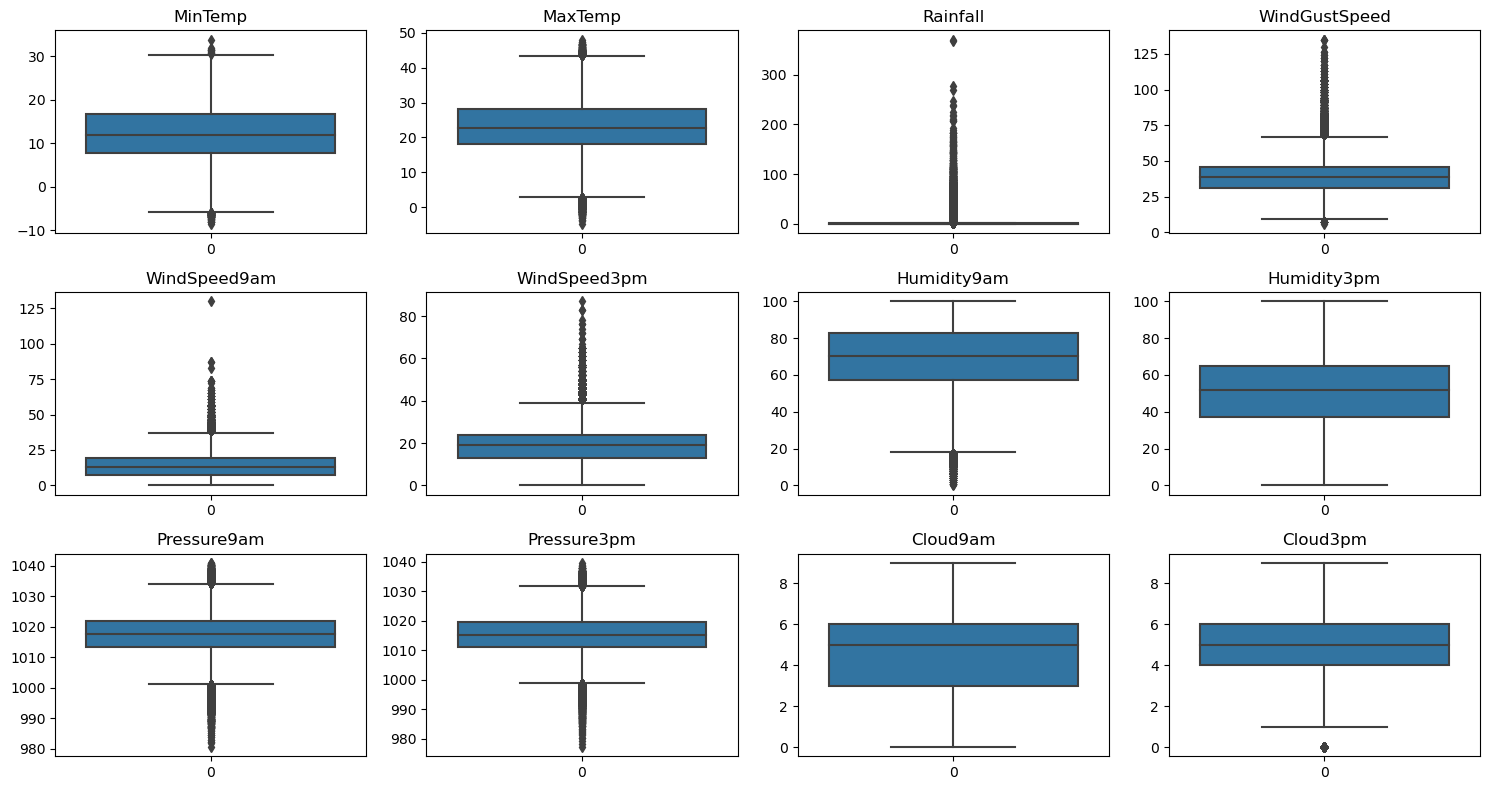

In [119]:
# Selecting numerical features
features = list(data.select_dtypes(include=np.number).columns)

# Creating subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 8))

# Flattening the axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(features):
    if i < len(axes):
        sns.boxplot(data[col], ax=axes[i])
        axes[i].set_title(col)

# Removing any extra axes(avoiding the indexError)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [120]:
Q1 = data['Pressure9am'].quantile(0.25)
Q3 = data['Pressure9am'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = data[(data['Pressure9am'] < (Q1 - 1.5 * IQR)) | (data['Pressure9am'] > (Q3 + 1.5 * IQR))]
print(outliers)


             Date  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
12     2008-12-13     15.9     18.6      15.6           W           61.0   
296    2009-09-23      9.3     16.8      28.8           W           56.0   
317    2009-10-14      9.5     15.1       7.0           W           65.0   
363    2009-11-29     12.8     22.3       9.4         WNW           46.0   
466    2010-03-12     10.6     25.0       0.0         NNE           20.0   
...           ...      ...      ...       ...         ...            ...   
143707 2017-01-02     23.2     31.0      69.0         NNW           28.0   
144561 2015-01-09     22.5     27.1       7.2           S           48.0   
145278 2016-12-26     22.1     27.4      83.8         ENE           72.0   
145279 2016-12-27     22.1     35.8      63.8         WNW           43.0   
145280 2016-12-28     22.6     36.8       0.0          NW           50.0   

       WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  ...  Cloud3pm  \
12          

**the thing is, in weather data extreme values are expected, and removing them or doing any further action could mess with credibility of our dataset that's why I'll not be acting on that for the moment**

## Splitting the data

In [123]:
from sklearn.model_selection import train_test_split

# RainTomorrow' is our target variable
X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Scaling the Data:

In [127]:
def convert_timestamp(df):
    if 'Date' in df.columns:
        df['Year'] = pd.to_datetime(df['Date']).dt.year
        df['Month'] = pd.to_datetime(df['Date']).dt.month
        df['Day'] = pd.to_datetime(df['Date']).dt.day
        df = df.drop('Date', axis=1)
    return df

X_train = convert_timestamp(X_train)
X_test = convert_timestamp(X_test)


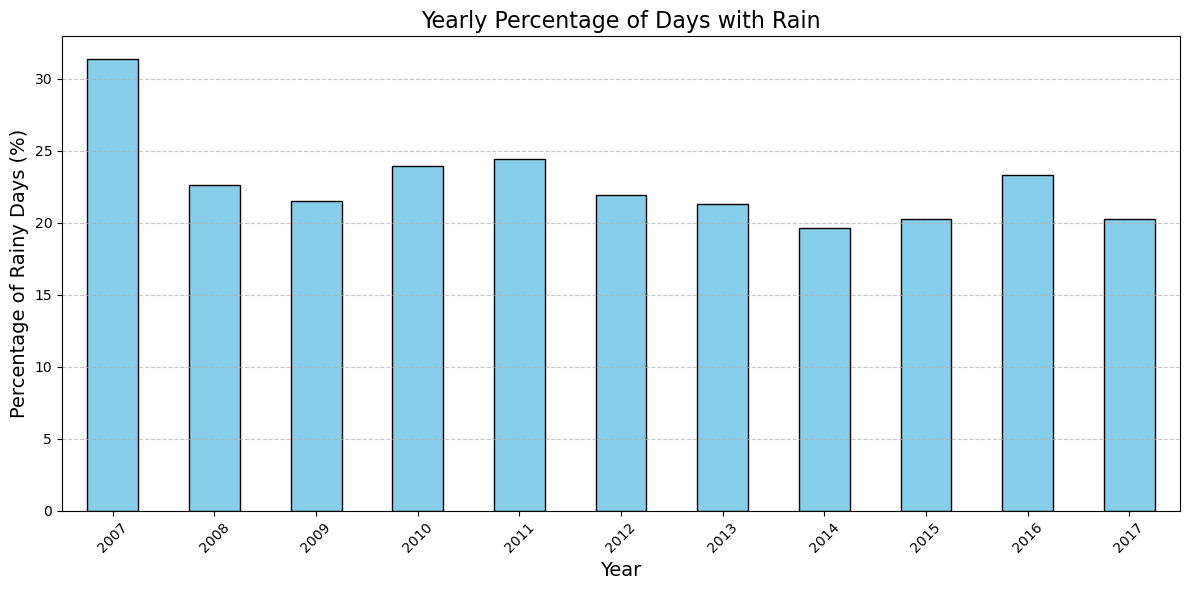

In [129]:
#plotting yearly precipitation
# Group data by Year and calculate the percentage of days with rain
rain_by_year = X_train.groupby('Year')['RainToday'].mean() * 100

# Plotting
plt.figure(figsize=(12, 6))
rain_by_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Yearly Percentage of Days with Rain', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Rainy Days (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [132]:
X_train.head()


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Temp3pm,RainToday,Rainfall_mean,Rainfall_std,MaxTemp_mean,MinTemp_mean,RainToday_freq,Year,Month,Day
111548,14.5,17.8,14.2,W,39.0,N,SE,0.0,19.0,94.0,...,21.1,1,2.245987,5.095324,20.115921,12.928783,0.0,2017,4,24
142528,24.6,39.5,0.0,SE,31.0,N,NW,9.0,17.0,52.0,...,39.2,0,3.164575,11.327283,34.622750,20.287959,0.0,2013,10,11
65304,14.7,26.6,0.2,SSE,30.0,SW,S,7.0,11.0,87.0,...,24.5,0,1.451977,4.592725,20.491858,9.973945,0.0,2012,2,18
40651,18.3,26.6,0.0,SE,28.0,WSW,SSE,11.0,22.0,79.0,...,25.4,0,3.046893,10.906353,23.999668,12.779661,0.0,2012,2,18
97487,11.4,19.3,0.6,W,31.0,SW,SSW,13.0,19.0,63.0,...,18.3,0,1.516317,4.519225,22.898653,12.579142,0.0,2011,10,11


**By applying the RobustScaler only to the numerical columns, we ensure that the scaling process is only affecting the appropriate data type. The categorical columns are left unchanged, so no error occurs when the scaler encounters non-numeric data.**

In [135]:
#Using Robust scaling because our data has significant outliers that may skew standard scaling methods.
#it is less sensitive to outlierscompared to other scaling methods
#How it works: Each feature's median is subtracted from the data.The data is then divided by the IQR, which is the range between the 25th percentile (Q1) and the 75th percentile (Q3).
from sklearn.preprocessing import RobustScaler
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
# Initialize the RobustScaler
scaler = RobustScaler()


# Fit the scaler on the training data and transform it for numerical data
X_train_scaled = X_train[numerical_cols].copy() # Copy to avoid modifying original data
X_train_scaled = scaler.fit_transform(X_train_scaled)#This computes the scaling parameters (median and IQR) from the training data and scales the training data.


# Transform the test data using the same scaler (not fitting again)
X_test_scaled = X_test[numerical_cols].copy() 
X_test_scaled = scaler.transform(X_test_scaled)#This applies the scaling to the test data using the parameters learned from the training data.


# Replace the numerical columns in the original data with the scaled data
X_train[numerical_cols] = X_train_scaled
X_test[numerical_cols] = X_test_scaled

In [137]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Temp3pm,RainToday,Rainfall_mean,Rainfall_std,MaxTemp_mean,MinTemp_mean,RainToday_freq,Year,Month,Day
111548,0.274725,-0.470588,23.666667,W,0.000000,N,SE,-1.083333,0.000000,0.923077,...,0.000000,1.0,0.106278,-0.159764,-0.605846,0.124458,0.0,2017,4,24
142528,1.384615,1.656863,0.000000,SE,-0.533333,N,NW,-0.333333,-0.181818,-0.692308,...,1.885417,0.0,0.699367,1.273585,2.439711,1.584874,0.0,2013,10,11
65304,0.296703,0.392157,0.333333,SSE,-0.600000,SW,S,-0.500000,-0.727273,0.653846,...,0.354167,0.0,-0.406377,-0.275361,-0.526922,-0.461925,0.0,2012,2,18
40651,0.692308,0.392157,0.000000,SE,-0.733333,WSW,SSE,-0.166667,0.272727,0.346154,...,0.447917,0.0,0.623385,1.176771,0.209506,0.094865,0.0,2012,2,18
97487,-0.065934,-0.323529,1.000000,W,-0.533333,SW,SSW,0.000000,0.000000,-0.269231,...,-0.291667,0.0,-0.364836,-0.292266,-0.021641,0.055072,0.0,2011,10,11


In [139]:
print(len(data.columns))

25


## Feature selection

**Justifying the choice of multi_info_classif**:</br>
When used in feature selection, mutual_info_classif ranks features based on their ability to provide useful information about the target variable, regardless of **linear** or **non-linear relationships**.</br>

**Key Feature:** It works well with non-linear dependencies and doesn't assume the data follows any specific distribution.

In [143]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [145]:
numerical_features_train = X_train.select_dtypes(include=['number'])
numerical_features_test = X_test.select_dtypes(include=['number'])

In [147]:
# Apply SelectKBest on training data
k_best = SelectKBest(score_func=mutual_info_classif, k=15)  # Select top 15 features
X_train_selected = k_best.fit_transform(numerical_features_train, y_train)


In [148]:
#Apply the same transformation to the test data
X_test_selected = k_best.transform(numerical_features_test)

In [149]:
# Check selected feature names
selected_feature_names = numerical_features_train.columns[k_best.get_support()]
print("Selected Features:", selected_feature_names)

Selected Features: Index(['MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp3pm',
       'RainToday', 'Rainfall_mean', 'Rainfall_std', 'MaxTemp_mean',
       'MinTemp_mean'],
      dtype='object')


==>**Now X_train_selected and X_test_selected can be used for model training and testing**

## Model Training & Selection:

**LOGISTIC REGRESSION**

In [153]:
# training (logistic regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

lr = LogisticRegression(max_iter=1000,solver='liblinear')
lr.fit(X_train_selected, y_train)

# Evaluate the model
y_pred = lr.predict(X_test_selected)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.72      0.47      0.57      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [154]:
# Predict class labels
y_train_pred = lr.predict(X_train_selected)
y_test_pred = lr.predict(X_test_selected)

In [155]:
# Predict probabilities for ROC-AUC
y_train_pred_proba = lr.predict_proba(X_train_selected)[:, 1]
y_test_pred_proba = lr.predict_proba(X_test_selected)[:, 1]

In [156]:
# Evaluate the model
print("Training ROC-AUC:", roc_auc_score(y_train, y_train_pred_proba))#Calculates the ROC-AUC (Receiver Operating Characteristic - Area Under Curve) score for both training and testing datasets.
print("Testing ROC-AUC:", roc_auc_score(y_test, y_test_pred_proba))

Training ROC-AUC: 0.8567565682723366
Testing ROC-AUC: 0.8558161960792074


In [157]:
# Classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.72      0.47      0.57      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



Accuracy: 84.24%
F1 Score: 56.72%
Precision: 71.96% (Good at correctly identifying "Rain")
Recall: 46.81% (Low sensitivity; misses some "Rain" days)
=>Logistic Regression achieves high precision, meaning it’s confident when predicting "Rain," but its lower recall indicates it’s not capturing all the rainy days.

**KNN WITH n=5 & n=10**

In [160]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Initialize dictionaries to store results
results = {}

# Define the values of n_neighbors to test
n_values = [5, 10]  # Add more values if needed

for n in n_values:
    # Initialize KNN with the current n_neighbors
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train_selected, y_train)

    # Predictions and probabilities
    y_train_pred = knn_model.predict(X_train_selected)
    y_test_pred = knn_model.predict(X_test_selected)
    y_test_pred_proba = knn_model.predict_proba(X_test_selected)[:, 1]

    # Evaluate the model performance
    train_accuracy = knn_model.score(X_train_selected, y_train)
    test_accuracy = knn_model.score(X_test_selected, y_test)
    test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)
    classification_rep = classification_report(y_test, y_test_pred, output_dict=True)
    confusion_mat = confusion_matrix(y_test, y_test_pred)

    # Save the results for the current n
    results[n] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "ROC-AUC (Test)": test_roc_auc,
        "Classification Report": classification_rep,
        "Confusion Matrix": confusion_mat,
    }

# Display results side-by-side
results_df = pd.DataFrame.from_dict(results, orient="index")
print(results_df[["Train Accuracy", "Test Accuracy", "ROC-AUC (Test)"]])

# Show classification reports for both n values
for n, metrics in results.items():
    print(f"\n=== Classification Report for n = {n} ===")
    print(pd.DataFrame(metrics["Classification Report"]).transpose())
    print(f"\nConfusion Matrix for n = {n}:\n", metrics["Confusion Matrix"])


    Train Accuracy  Test Accuracy  ROC-AUC (Test)
5         0.878051       0.830056        0.814463
10        0.860236       0.837103        0.840165

=== Classification Report for n = 5 ===
              precision    recall  f1-score       support
0              0.864055  0.927929  0.894853  22672.000000
1              0.655565  0.484424  0.557148   6420.000000
accuracy       0.830056  0.830056  0.830056      0.830056
macro avg      0.759810  0.706176  0.726001  29092.000000
weighted avg   0.818045  0.830056  0.820329  29092.000000

Confusion Matrix for n = 5:
 [[21038  1634]
 [ 3310  3110]]

=== Classification Report for n = 10 ===
              precision    recall  f1-score       support
0              0.853862  0.954305  0.901293  22672.000000
1              0.723954  0.423209  0.534159   6420.000000
accuracy       0.837103  0.837103  0.837103      0.837103
macro avg      0.788908  0.688757  0.717726  29092.000000
weighted avg   0.825194  0.837103  0.820275  29092.000000

Confusion

<span style="color:blue">*NOTES:*</span></br>
**The ROC-AUC score measures the model's ability to distinguish between the classes.</br>
A higher ROC-AUC score (e.g., > 0.8) indicates a good classifier.</br>
A large gap between training and testing ROC-AUC scores might indicate overfitting**

**INTERPRETATION**:</br>
Class 0 (No Rain Tomorrow): our knn model performs well, with high precision, recall, and F1-score.

Class 1 (Rain Tomorrow): our knn model struggles more with predicting rain, with lower precision, recall, and F1-score.

Overall Performance: our knn modelhas a good overall accuracy (83%), but the performance for predicting rain (class 1) could be improved.

<span style="color:red">**KNN (k=5):**</span></br>
- **Train Accuracy:** 87.81% (Good fit to training data)
- **Test Accuracy:** 83.01% (Slight overfitting but reasonable)
- **ROC-AUC:** 81.45% (Good separation ability for the classes)
  
<span style="color:red">**KNN (k=10):**</span></br>
- **Train Accuracy:** 86.02% (Slightly less complex than KNN-5)
- **Test Accuracy:** 83.71% (Improved generalization compared to KNN-5)
- **ROC-AUC:** 84.02% (Best in separating classes among models)

<span style="color:blue">**Reminder**:</span></br>
True Negatives (TN) - The model correctly predicted "No" (it won't rain tomorrow).</br>

False Positives (FP) - The model incorrectly predicted "Yes" (it will rain tomorrow) when it won't.</br>

False Negatives (FN) - The model incorrectly predicted "No" (it won't rain tomorrow) when it will.</br>

 True Positives (TP) - The model correctly predicted "Yes" (it will rain tomorrow).</br>

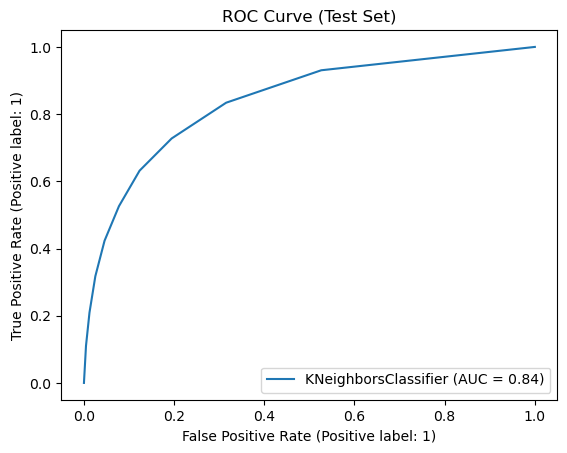

In [165]:
# Plot ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(knn_model, X_test_selected, y_test)
# Set the title for the ROC curve plot
plt.title("ROC Curve (Test Set)")
# Show the plot
plt.show()

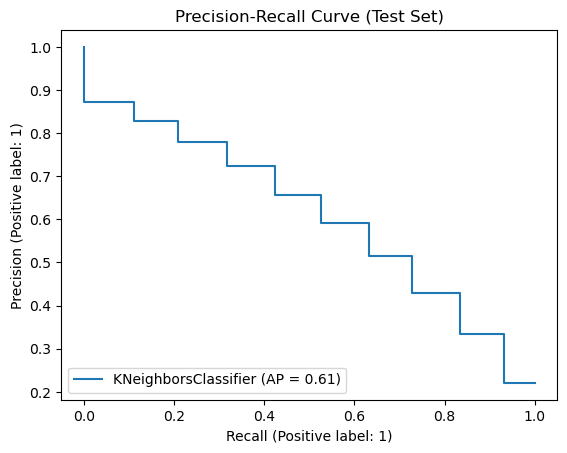

In [166]:
# Plot Precision-Recall Curve
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(knn_model, X_test_selected, y_test)
plt.title("Precision-Recall Curve (Test Set)")
plt.show()

=> Decreasing Precision with Increasing Recall: As the classifier tries to identify more positive samples (higher recall), the precision decreases, meaning more false positives are included.

**DecisionTree**

In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5)  # Adjust max_depth as needed

# Fit the Decision Tree model to the training data
dt_model.fit(X_train_selected, y_train)

# Predict class labels
y_train_pred = dt_model.predict(X_train_selected)
y_test_pred = dt_model.predict(X_test_selected)

In [170]:
# Predict probabilities for ROC-AUC
# Predict the probabilities of the yes its gonna rain for the training set
y_train_pred_proba = dt_model.predict_proba(X_train_selected)[:, 1]
# Predict the probabilities of the yes its gonna rain for the test set
y_test_pred_proba = dt_model.predict_proba(X_test_selected)[:, 1]

In [174]:
# Evaluate the model
print("Training ROC-AUC:", roc_auc_score(y_train, y_train_pred_proba))
print("Testing ROC-AUC:", roc_auc_score(y_test, y_test_pred_proba))

Training ROC-AUC: 0.8332181125857984
Testing ROC-AUC: 0.8294938333641122


## Reminder:</br>
- Precision: The percentage of positive predictions that are actually correct.</br>
- Recall: The percentage of actual positives correctly identified.</br>
- F1-Score: Harmonic mean of precision and recall.</br>
- Support: Number of actual occurrences of each class.</br>
- Overall Metrics:
- Accuracy : The proportion of correct predictions (both classes) out of all predictions.

**Macro Average:**

- Precision : The average precision across both classes.

- Recall : The average recall across both classes.

- F1-Score : The average F1-score across both classes.

**Weighted Average:**

- Precision : The average precision across both classes, weighted by the number of instances in each class.

- Recall : The average recall across both classes, weighted by the number of instances in each class.

- F1-Score : The average F1-score across both classes, weighted by the number of instances in each class.

In [181]:
# Classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.91      0.80      0.85     22672
           1       0.50      0.71      0.59      6420

    accuracy                           0.78     29092
   macro avg       0.70      0.75      0.72     29092
weighted avg       0.82      0.78      0.79     29092



**True Positives (TP):** Correctly predicted "Yes".</br>
**True Negatives (TN):** Correctly predicted "No".</br>
**False Positives (FP):** Incorrectly predicted "Yes" when the actual was "No".</br>
**False Negatives (FN):** Incorrectly predicted "No" when the actual was "Yes".</br>


In [183]:
# Confusion Matrix
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix (Test Set):
[[18037  4635]
 [ 1838  4582]]


True Negatives (TN): 18037 instances where our model correctly predicted "No Rain Tomorrow."

False Positives (FP): 4635 instances where our model incorrectly predicted "Yes Rain Tomorrow."

False Negatives (FN): 1838 instances where our model incorrectly predicted "No Rain Tomorrow."

True Positives (TP): 4582 instances where our model correctly predicted "Yes Rain Tomorrow."

**the ROC curve, showing the trade-off between True Positive Rate (Recall) and False Positive Rate (1-Specificity).**

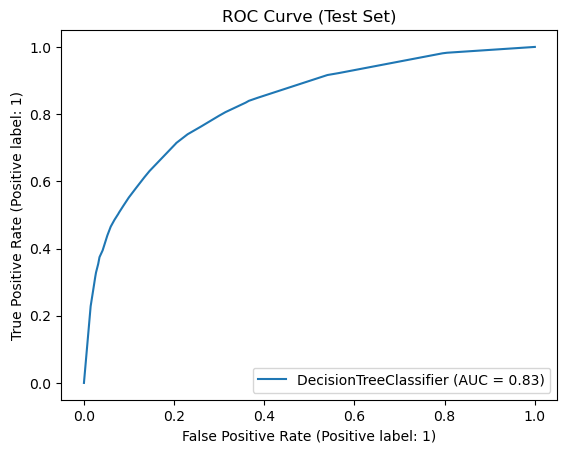

In [186]:
# Plot ROC Curve
RocCurveDisplay.from_estimator(dt_model, X_test_selected, y_test)
plt.title("ROC Curve (Test Set)")
plt.show()

Plots the trade-off between Precision and Recall at different probability thresholds.

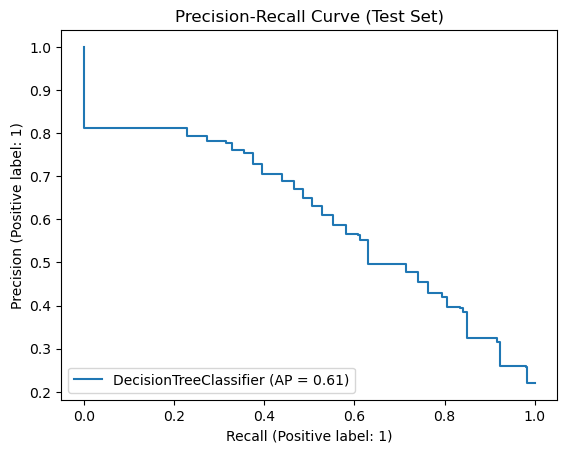

In [188]:
# Plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(dt_model, X_test_selected, y_test)
plt.title("Precision-Recall Curve (Test Set)")
plt.show()

the Precision drops significantly as Recall increases, the model might be sacrificing too much Precision to achieve higher Recaall.
At the beginning of the curve, the precision is very high (1.0), but the recall is low. This means that when the classifier predicts positive samples, it is very accurate, but it misses many actual positive samples.
he curve shows that our model has a good precision at the cost of recall. This means it is good at making accurate positive predictions but may miss some actual positive cases.

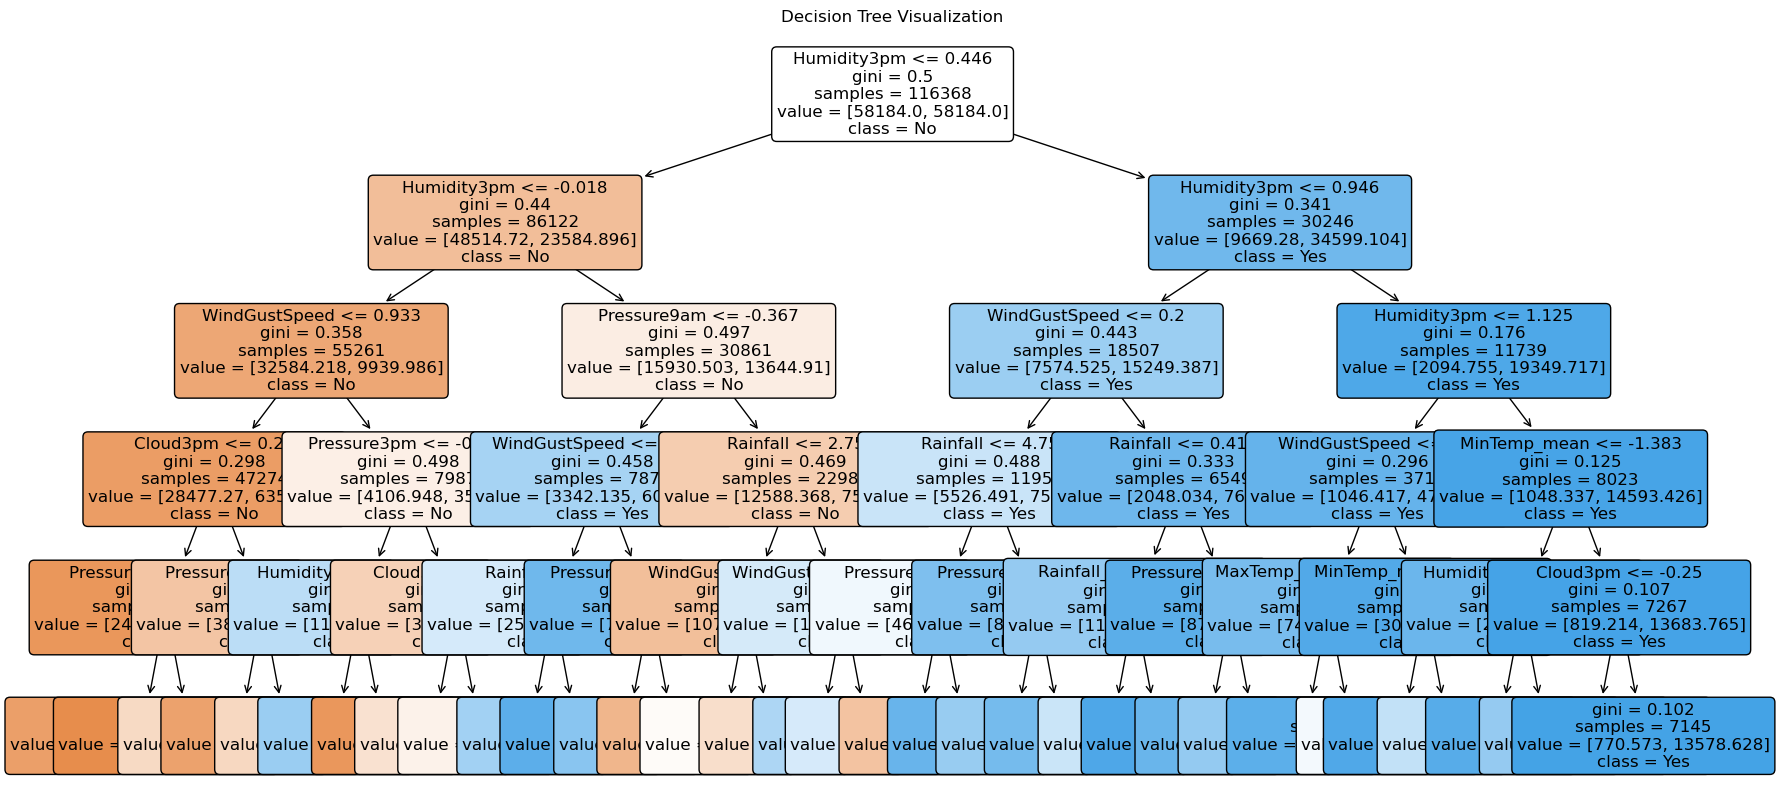

In [190]:
# Step 6: Visualize the Decision Tree
selected_features = list(selected_feature_names)
plt.figure(figsize=(20, 10)) 
plot_tree(dt_model, filled=True, feature_names=selected_features, class_names=['No', 'Yes'], rounded=True,fontsize=12)
plt.title("Decision Tree Visualization") 
plt.show()

**Decision Tree:**

- Accuracy: 77.75% (Lower than Logistic Regression)</br>
- F1 Score: 58.60% (Slightly better balance than Logistic Regression)</br>
- Precision: 49.71% (Struggles with predicting "Rain" correctly)</br>
- Recall: 71.37% (Better sensitivity; captures more "Rain" days)</br>
=>Decision Tree achieves higher recall but struggles with precision, meaning it tends to overpredict "Rain."</br>

**Comparing between Logistic regression and DEcision Tree perforamnce**

In [193]:
# Define a list of models to evaluate
models = [lr, dt_model]

# Define corresponding names for the models
model_names = ["Logistic Regression", "Decision Tree"]

# Import necessary metrics from sklearn for evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Initialize an empty list to store results
results = []

# Iterate over each model and its corresponding name
for model, name in zip(models, model_names):
    # Make predictions using the test set
    predictions = model.predict(X_test_selected)
    
    # Calculate accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    
    # Calculate F1 score of the model
    f1 = f1_score(y_test, predictions)
    
    # Calculate precision of the model
    precision = precision_score(y_test, predictions)
    
    # Calculate recall of the model
    recall = recall_score(y_test, predictions)
    
    # Append the results for the current model to the results list
    results.append({'Model': name, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall})

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Print the DataFrame containing the evaluation results
print(results_df)

                 Model  Accuracy  F1 Score  Precision    Recall
0  Logistic Regression  0.842362  0.567195   0.719588  0.468069
1        Decision Tree  0.777499  0.586046   0.497125  0.713707


| Model                 | Strengths                                   | Weaknesses                                  |
|-----------------------|--------------------------------------------|--------------------------------------------|
| Logistic Regression   | High precision (71.96%), interpretable coefficients. | Low recall (46.81%); misses many rainy days. |
| Decision Tree         | High recall (71.37%), good for identifying "Rain" cases. | Overfits to training data, lower precision (49.71%). |
| KNN (k=5)             | Balanced performance (Train Accuracy: 87.81%, Test: 83.01%). | Slight overfitting, lower ROC-AUC than KNN-10. |
| KNN (k=10)            | Best Test Accuracy (83.71%) and ROC-AUC (84.02%). | Slightly less flexible due to higher k, might not capture local patterns well. |


## I tried to work with SVM and I tried a couple of kernel types but it gets a lot of running time without a result

**SVM Poly kernel**

In [ ]:
from sklearn.svm import SVC  # Importing the Support Vector Classifier from sklearn

# Initializing the SVC model with a polynomial kernel of degree 3 and balanced class weights
kernel_poly_SVM = SVC(kernel='poly', degree=3, class_weight='balanced')

# Fitting the SVM model to the training data
kernel_poly_SVM.fit(X_train_selected, y_train)

# Making predictions on the test data using the trained model
y_pred_poly = kernel_poly_SVM.predict(X_test_selected)

# Evaluating the model's performance
cm_poly = confusion_matrix(y_test, y_pred_poly)  # Confusion matrix to evaluate the accuracy of the model
report_poly = classification_report(y_test, y_pred_poly)  # Detailed classification report
accuracy_poly = accuracy_score(y_test, y_pred_poly)  # Overall accuracy score

# Displaying the results of the evaluation
print("********** SVM avec Noyau Polynomial **********")
print("Matrice de confusion:\n", cm_poly)  # Printing the confusion matrix
print("Rapport de classification:\n", report_poly)  # Printing the classification report
print("Accuracy:", accuracy_poly)  # Printing the accuracy score
print("Nombre de vecteurs de support par classe:", kernel_poly_SVM.n_support_)  # Printing the number of support vectors for each class